<h3> Przekształcenia kontekstowe </h3>

Przkeształcenia kontekstowe uwzględniają sąsiedztwo piksela. Oznacza to że wyjściowa wartość piksela żależy również od jego sąsiedztwa. Odbywa się to za pomocą "maski", która przykrywa dany fragment obrazy dokonując jakiejś operacji.

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import math

In [5]:
def wczytaj_obraz(sciezka):
    return Image.open(sciezka)

def obraz_do_macierz(obraz):
    return np.array(obraz)

def macierz_do_obraz(macierz):
    return Image.fromarray(macierz.astype(np.uint8))

def rozbij_na_kanaly(obraz):
    macierz = obraz_do_macierz(obraz)
    k1 = macierz[:,:,0]
    k2 = macierz[:,:,1]
    k3 = macierz[:,:,2]
    return k1, k2, k3

def zloz(kanal1,kanal2,kanal3):
    macierz = np.stack((kanal1, kanal2, kanal3),axis=2)
    return macierz_do_obraz(macierz)

def obrot(obraz):
    macierz = obraz_do_macierz(obraz)
    obrocona = np.rot90(macierz)
    return macierz_do_obraz(obrocona)

def odbicie(obraz):
    macierz = obraz_do_macierz(obraz)
    obrocona = np.fliplr(macierz)
    return macierz_do_obraz(obrocona)

def zlicz(macierz):
    zliczenie = OrderedDict()
    for wiersz in macierz.tolist():
        for wartosc in wiersz:
            if wartosc in zliczenie.keys():
                zliczenie[wartosc] += 1
            else:
                zliczenie[wartosc] = 1
    return zliczenie

def histogram(obraz):
    k1, k2, k3 = rozbij_na_kanaly(obraz)
    histR = zlicz(k1)
    histG = zlicz(k2)
    histB = zlicz(k3)
    plt.figure(figsize=(15,15))
    plt.subplot(4,1,1)
    plt.bar(histR.keys(), histR.values(), color = 'red', alpha = .8, width = 1)
    
    plt.subplot(4,1,2)
    plt.bar(histG.keys(), histG.values(), color = 'green', alpha = .8, width = 1)
    
    plt.subplot(4,1,3)
    plt.bar(histB.keys(), histB.values(), color = 'blue', alpha = .8, width = 1)

    plt.subplot(4,1,4)
    plt.bar(histR.keys(), histR.values(), color = 'red', alpha = .8, width = 1)
    plt.bar(histG.keys(), histG.values(), color = 'green', alpha = .8, width = 1)
    plt.bar(histB.keys(), histB.values(), color = 'blue', alpha = .8, width = 1)

def negacja(obraz):
    macierz = obraz_do_macierz(obraz)
    macierz = 255 - macierz
    nowy_obraz = macierz_do_obraz(macierz)
    return nowy_obraz

def jasnosc(obraz, wartosc):
    macierz = obraz_do_macierz(obraz)
    LUT = np.arange(256)
    LUT += wartosc
    LUT = np.clip(LUT,0,255)
    for kanal in range(macierz.shape[2]):
        for x in range(macierz.shape[0]):
            for y in range(macierz.shape[1]):
                nowa_wartosc =  LUT[macierz[x,y,kanal]]
                if nowa_wartosc > 255:
                    nowa_wartosc = 255
                elif nowa_wartosc < 0:
                    nowa_wartosc = 0
                macierz[x,y,kanal] = nowa_wartosc
    nowy_obraz = macierz_do_obraz(macierz)
    return nowy_obraz

def kontrast(obraz, prog):
    macierz = obraz_do_macierz(obraz)
    LUT = np.arange(256)
    LUT = ((LUT - prog)*255)/(255-(2*prog))
    LUT = np.clip(LUT,0,255)
    for kanal in range(macierz.shape[2]):
        for x in range(macierz.shape[0]):
            for y in range(macierz.shape[1]):
                nowa_wartosc = LUT[macierz[x,y,kanal]]
                macierz[x,y,kanal] = nowa_wartosc
    nowy_obraz = macierz_do_obraz(macierz)
    return nowy_obraz

def odcienie_szarosc(obraz):
    macierz = obraz_do_macierz(obraz)
    macierz = np.mean(macierz,axis=2)
    nowy_obraz = macierz_do_obraz(macierz)
    return nowy_obraz

def progowanie(obraz, prog):
    
    macierz = obraz_do_macierz(obraz)
    LUT = np.arange(256)
    LUT[:prog] = 0
    LUT[prog:] = 255
    
    for x in range(macierz.shape[0]):
        for y in range(macierz.shape[1]):
            macierz[x,y] = LUT[macierz[x,y]]
    nowy_obraz = macierz_do_obraz(macierz)
    
    return nowy_obraz

<h4> Filtry liniowe </h4>
    
Są to tak zwane operacje konwolucji, czyli przeplatania dwóch macierzy. Obraz przemnażany jest przez maskę w celu uzyskania żądanego efektu. Wyróżniamy dwa rozdaje filtrów:

    Dolnoprzepustowe
    
    Górnoprzepustowe

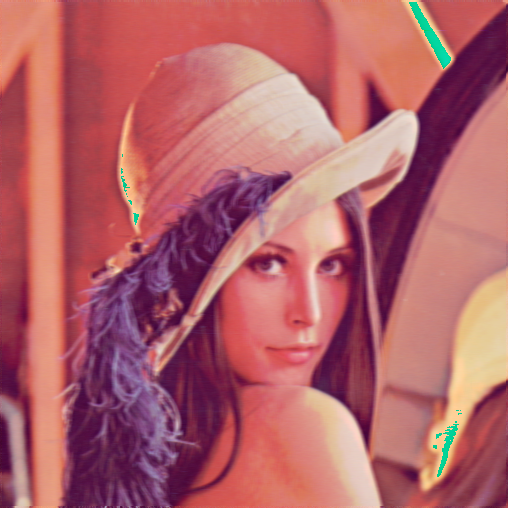

In [6]:
def filtr_dolno(obraz,maska):
    offset = math.floor((maska.shape[0])/2)
    macierz = obraz_do_macierz(obraz)
    nowa_macierz = macierz.copy()[offset:macierz.shape[0]-offset,offset:macierz.shape[1]-offset]
    for kanal in range(macierz.shape[2]):
        for x in range(offset,nowa_macierz.shape[0]-offset):
            for y in range(offset,nowa_macierz.shape[1]-offset):
                fragment = macierz[x-offset:x+offset+1,y-offset:y+offset+1,kanal]
                fragment = fragment * maska
                fragment = np.round(fragment * (1/maska.sum()))
                srodek = np.sum(fragment)
                nowa_macierz[x,y,kanal] = srodek
    nowy_obraz= macierz_do_obraz(nowa_macierz)
    return nowy_obraz


filtr_dolno(wczytaj_obraz("Lena.png"),np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[10,10,10,10,10]]))

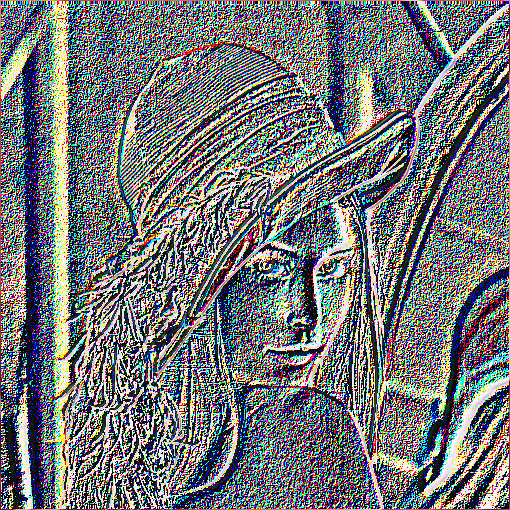

In [7]:
def filtr_gorno(obraz,maska):
    offset = math.floor((maska.shape[0])/2)
    macierz = obraz_do_macierz(obraz)
    nowa_macierz = macierz.copy()[offset:macierz.shape[0]-offset,offset:macierz.shape[1]-offset]
    for kanal in range(macierz.shape[2]):
        for x in range(offset,nowa_macierz.shape[0]-offset):
            for y in range(offset,nowa_macierz.shape[1]-offset):
                fragment = macierz[x-offset:x+offset+1,y-offset:y+offset+1,kanal]
                fragment = fragment * maska
                srodek = np.sum(fragment)
                if srodek > 255:
                    srodek = 255
                nowa_macierz[x,y,kanal] = srodek
    nowy_obraz= macierz_do_obraz(nowa_macierz)
    return nowy_obraz

filtr_gorno(wczytaj_obraz("Lena.png"),np.array([[0,0,0],[-1,0,0],[0,1,0]]))

In [1]:
def kumuluj(hist):
    skumulowanie = OrderedDict()
    sort_hist = sorted(hist.items())
    suma = 0
    for piksel, wartosc in sort_hist:
        suma += wartosc
        skumulowanie[piksel] = suma
    return skumulowanie

def histogram_skumulowany(obraz):
    k1, k2, k3 = rozbij_na_kanaly(obraz)
    histR = zlicz(k1)
    histG = zlicz(k2)
    histB = zlicz(k3)
    skum_histR = kumuluj(histR)
    skum_histG = kumuluj(histG)
    skum_histB = kumuluj(histB)
    plt.figure(figsize=(15,15))
    plt.subplot(4,1,1)
    plt.bar(skum_histR.keys(), skum_histR.values(), color = 'red', alpha = .8, width = 1)
    
    plt.subplot(4,1,2)
    plt.bar(skum_histG.keys(), skum_histG.values(), color = 'green', alpha = .8, width = 1)
    
    plt.subplot(4,1,3)
    plt.bar(skum_histB.keys(), skum_histB.values(), color = 'blue', alpha = .8, width = 1)

    plt.subplot(4,1,4)
    plt.bar(skum_histR.keys(), skum_histR.values(), color = 'red', alpha = .8, width = 1)
    plt.bar(skum_histG.keys(), skum_histG.values(), color = 'green', alpha = .8, width = 1)
    plt.bar(skum_histB.keys(), skum_histB.values(), color = 'blue', alpha = .8, width = 1)
    return skum_histR,skum_histG,skum_histB

def wyrownaj_histogram(obraz):
    macierz = obraz_do_macierz(obraz)
    R, G, B = histogram_skumulowany(obraz)
    N = macierz.shape[0] * macierz.shape[1]
    for piksel, wartosc in R.items():
        R[piksel] = int((R[piksel]*255)/N)
   
    for piksel, wartosc in G.items():
        G[piksel] = int((G[piksel]*255)/N)
    
    for piksel, wartosc in B.items():
        B[piksel] = int((B[piksel]*255)/N)

    for x in range(macierz.shape[0]):
        for y in range(macierz.shape[1]): 
            macierz[x,y,0] = R[macierz[x,y,0]]
            macierz[x,y,1] = G[macierz[x,y,1]]
            macierz[x,y,2] = B[macierz[x,y,2]]
            
    nowy_obraz = macierz_do_obraz(macierz)
    return nowy_obraz